## Value at Risk (VaR) Using the Monte Carlo
We will perform a **Value at Risk (VaR)** simulation for a portfolio of stocks using Python and the yfinance library. We will use historical stock prices to calculate the expected return and standard deviation of the portfolio, and then run a Monte Carlo simulation to estimate the VaR.

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.stats import norm

# Set Time Range and Ticker List
We will set the time range for our historical data to 15 years and create a list of stock tickers for our portfolio.

In [ ]:
### Set time from to a certain number of years
years = 15

endDate = dt.datetime.now()
startDate = endDate - dt.timedelta(days = 365*years)

### Create a list of tickers
tickers = ['SPY','BND','GLD','QQQ','VTI']

# Download Adjusted Close Prices
Download the daily adjusted close prices for each stock ticker using the yfinance library and store the data in a DataFrame.

In [ ]:
### Download the daily adjusted close prices for the tickers
adj_close_df = pd.DataFrame()

for ticker in tickers:
    data = yf.download(ticker, start = startDate, end = endDate)
    print(data.dtypes)
    print(data['Adj Close'])
    #data
    adj_close_df[ticker] = data['Adj Close']

print(adj_close_df.dtypes)
print(adj_close_df)

[*********************100%%**********************]  1 of 1 completed
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object
Date
2008-11-28     67.422653
2008-12-01     61.450474
2008-12-02     63.815407
2008-12-03     65.349609
2008-12-04     63.837852
                 ...    
2023-11-17    450.790009
2023-11-20    454.260010
2023-11-21    453.269989
2023-11-22    455.019989
2023-11-24    455.299988
Name: Adj Close, Length: 3773, dtype: float64
[*********************100%%**********************]  1 of 1 completed
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object
Date
2008-11-28    48.992622
2008-12-01    49.282425
2008-12-02    49.581314
2008-12-03    49.347416
2008-12-04    49.561848
                ...    
2023-11-17    70.639999
2023-11-20    70.739998
2023-11-21    70.839996
2023-11-22    70.900002
2023-11-24 

# Calculate Daily Log Returns
Calculate the daily log returns for each stock in our portfolio and drop any missing values.

In [ ]:
### Calculate the daily log returns and drop any NAs
log_returns = np.log(adj_close_df/adj_close_df.shift(1))
log_returns  = log_returns.dropna()

print(log_returns)

log_returns

                 SPY       BND       GLD       QQQ       VTI
Date                                                        
2008-12-01 -0.092750  0.005898 -0.059777 -0.078184 -0.093641
2008-12-02  0.037763  0.006047  0.017038  0.032874  0.038658
2008-12-03  0.023757 -0.004729 -0.010057  0.027991  0.025431
2008-12-04 -0.023405  0.004336 -0.008966 -0.028710 -0.030212
2008-12-05  0.030366 -0.007370 -0.013065  0.039829  0.034852
...              ...       ...       ...       ...       ...
2023-11-17  0.001243  0.001417 -0.000109  0.000233  0.002513
2023-11-20  0.007668  0.001415 -0.001635  0.012101  0.007502
2023-11-21 -0.002182  0.001413  0.010740 -0.005826 -0.002717
2023-11-22  0.003853  0.000847 -0.004271  0.004085  0.004273
2023-11-24  0.000615 -0.004807  0.005188 -0.001411  0.001065

[3772 rows x 5 columns]


,SPY,BND,GLD,QQQ,VTI
Date,,,,,
2008-12-01,-0.092750,0.005898,-0.059777,-0.078184,-0.093641
2008-12-02,0.037763,0.006047,0.017038,0.032874,0.038658
2008-12-03,0.023757,-0.004729,-0.010057,0.027991,0.025431
2008-12-04,-0.023405,0.004336,-0.008966,-0.028710,-0.030212
2008-12-05,0.030366,-0.007370,-0.013065,0.039829,0.034852
...,...,...,...,...,...
2023-11-17,0.001243,0.001417,-0.000109,0.000233,0.002513
2023-11-20,0.007668,0.001415,-0.001635,0.012101,0.007502
2023-11-21,-0.002182,0.001413,0.010740,-0.005826,-0.002717


# Define Functions to Calculate Portfolio Expected Return and Standard Deviation
Define two functions, expected_return() and standard_deviation(), which will be used to calculate the expected return and standard deviation of our portfolio, respectively.

In [ ]:
### Create a function that will be used to calculate portfolio expected return
### We are assuming that future returns are based on past returns, which is not a reliable assumption.
def expected_return(weights, log_returns):
    return np.sum(log_returns.mean()*weights)

### Create a function that will be used to calculate portfolio standard deviation
def standard_deviation (weights, cov_matrix):
    variance = weights.T @ cov_matrix @ weights
    return np.sqrt(variance)

# Create a Covariance Matrix
Create a covariance matrix for all the securities in our portfolio using the daily log returns.

In [ ]:
### Create a covariance matrix for all the securities
cov_matrix = log_returns.cov()
print(cov_matrix)

          SPY           BND       GLD           QQQ       VTI
SPY  0.000135 -1.140051e-06  0.000007  1.445239e-04  0.000138
BND -0.000001  9.329953e-06  0.000009 -3.293531e-07 -0.000001
GLD  0.000007  8.723140e-06  0.000103  7.060422e-06  0.000008
QQQ  0.000145 -3.293531e-07  0.000007  1.794933e-04  0.000148
VTI  0.000138 -1.038561e-06  0.000008  1.478930e-04  0.000142


# Calculate Portfolio Expected Return and Standard Deviation
Create an equally weighted portfolio and calculate the portfolio’s expected return and standard deviation using the functions we defined earlier.

In [ ]:
### Create an equally weighted portfolio and find total portfolio expected return and standard deviation
portfolio_value = 1000000
weights = np.array([1/len(tickers)]*len(tickers))
portfolio_expected_return = expected_return(weights, log_returns)
portfolio_std_dev = standard_deviation (weights, cov_matrix)

# Define Functions for Monte Carlo Simulation
Define two functions: random_z_score() and scenario_gain_loss(). The first function generates a random Z-score based on a normal distribution, and the second function calculates the gain or loss for a given scenario.


In [ ]:
def random_z_score():
    return np.random.normal(0, 1)

### Create a function to calculate scenarioGainLoss
days = 20

def scenario_gain_loss(portfolio_value, portfolio_std_dev, z_score, days):
    return portfolio_value * portfolio_expected_return * days + portfolio_value * portfolio_std_dev * z_score * np.sqrt(days)

# Run Monte Carlo Simulation
Run 10,000 Monte Carlo simulations, calculating the scenario gain/loss for each simulation and storing the results in a list.

In [ ]:
### Run 10000 simulations
simulations = 10000
scenarioReturn = []

for i in range(simulations):
    z_score = random_z_score()
    scenarioReturn.append(scenario_gain_loss(portfolio_value, portfolio_std_dev, z_score, days))

# Calculate Value at Risk (VaR)
Specify a confidence interval of 99% and calculate Value at Risk (VaR) using the results of our simulations.

In [ ]:
### Specify a confidence interval and calculate the Value at Risk (VaR)
confidence_interval = 0.99
VaR = -np.percentile(scenarioReturn, 100 * (1 - confidence_interval))
print(VaR)

73418.95845463539


# Plot the Results
Create a histogram to visualize the distribution of portfolio gain/loss over the specified number of days. We also add a vertical dashed line to indicate the VaR at our chosen confidence level.

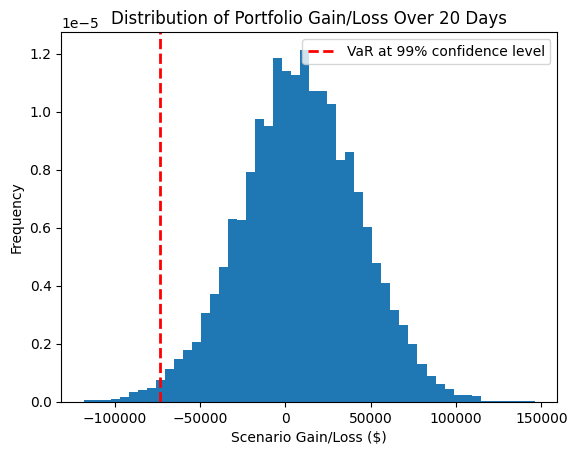

In [ ]:
### Plot the results of all 10000 scenarios
plt.hist(scenarioReturn, bins=50, density=True)
plt.xlabel('Scenario Gain/Loss ($)')
plt.ylabel('Frequency')
plt.title(f'Distribution of Portfolio Gain/Loss Over {days} Days')
plt.axvline(-VaR, color='r', linestyle='dashed', linewidth=2, label=f'VaR at {confidence_interval:.0%} confidence level')
plt.legend()
plt.show()